

Carga de datos

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive


In [3]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [4]:
ruta_archivo= "/content/gdrive/My Drive/Colab Notebooks/pacientes_small_s1.csv"
pd.read_csv(ruta_archivo, sep=';', engine='python')
pacientes_sm1= pd.read_csv(ruta_archivo, sep=';', engine='python')
pacientes_sm_semana = pacientes_sm1

Histograma solicitudes por día + promedio

In [5]:
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Contar pacientes que tienen "Si" en cada día de la semana
conteo_dias = pacientes_sm1[dias_semana].apply(lambda x: (x == 'Si').sum())

# Calcular el promedio de pacientes que son atendidos por día
promedio_dias = conteo_dias.mean()

# Mostrar el conteo por día y el promedio
print("Conteo de pacientes por día:\n", conteo_dias)
print("\nPromedio de pacientes atendidos por día:", promedio_dias)

Conteo de pacientes por día:
 LUNES        42
MARTES       47
MIERCOLES    48
JUEVES       45
VIERNES      53
SÁBADO       58
DOMINGO      44
dtype: int64

Promedio de pacientes atendidos por día: 48.142857142857146


Mismo histograma % de complejidades por día



In [6]:
# Lista de días de la semana
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Función para calcular el porcentaje de requerimientos por día
def calcular_porcentaje_requerimientos(df, columna_requerimientos, dias_semana):
    # Diccionario para almacenar los resultados
    porcentaje_requerimientos = {}

    for dia in dias_semana:
        # Filtrar solo los pacientes que se atienden ese día
        df_dia = df[df[dia] == 'Si']

        # Contar el total de cada tipo de requerimiento para ese día
        conteo_requerimientos = df_dia[columna_requerimientos].value_counts()

        # Calcular el porcentaje de cada tipo de requerimiento
        porcentaje = (conteo_requerimientos / conteo_requerimientos.sum()) * 100

        # Guardar el resultado en el diccionario
        porcentaje_requerimientos[dia] = porcentaje

    return porcentaje_requerimientos

# Usar la función para calcular los porcentajes por día
porcentaje_requerimientos_por_dia = calcular_porcentaje_requerimientos(pacientes_sm1, 'REQUERIMIENTO', dias_semana)

# Mostrar el porcentaje por cada día
for dia, porcentaje in porcentaje_requerimientos_por_dia.items():
    print(f"Porcentaje de requerimientos el {dia}:\n{porcentaje}\n")


Porcentaje de requerimientos el LUNES:
REQUERIMIENTO
Baja Complejidad                   28.571429
Evaluación o Seguimiento           19.047619
Mediana Complejidad                16.666667
Alta Complejidad                   16.666667
Ambulatorio Mediana Complejidad    14.285714
Ambulatorio Baja Complejidad        4.761905
Name: count, dtype: float64

Porcentaje de requerimientos el MARTES:
REQUERIMIENTO
Baja Complejidad                   34.042553
Alta Complejidad                   23.404255
Mediana Complejidad                19.148936
Evaluación o Seguimiento           17.021277
Ambulatorio Baja Complejidad        4.255319
Ambulatorio Mediana Complejidad     2.127660
Name: count, dtype: float64

Porcentaje de requerimientos el MIERCOLES:
REQUERIMIENTO
Baja Complejidad                58.333333
Alta Complejidad                31.250000
Mediana Complejidad              4.166667
Ambulatorio Baja Complejidad     4.166667
Evaluación o Seguimiento         2.083333
Name: count, dtype: float64


Mismo histograma % de requerimientos por dia

In [7]:
# Lista de días de la semana
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Función para calcular el porcentaje de pacientes que requieren medicamentos por día
def porcentaje_pacientes_con_medicamento(df, columna_medicamento, dias_semana):
    # Diccionario para almacenar los resultados
    porcentaje_medicamentos_por_dia = {}

    for dia in dias_semana:
        # Filtrar pacientes que se atienden ese día
        df_dia_total = df[df[dia] == 'Si']

        # Filtrar pacientes que requieren medicamentos ese día
        df_dia_medicamento = df_dia_total[df_dia_total[columna_medicamento].str.contains('Medicamento')]

        # Calcular el porcentaje de pacientes que requieren medicamentos
        if len(df_dia_total) > 0:
            porcentaje = (len(df_dia_medicamento) / len(df_dia_total)) * 100
        else:
            porcentaje = 0  # Si no hay pacientes ese día, el porcentaje es 0

        # Guardar el resultado en el diccionario
        porcentaje_medicamentos_por_dia[dia] = porcentaje

    return porcentaje_medicamentos_por_dia

# Usar la función para calcular el porcentaje de pacientes con medicamentos por día
porcentaje_medicamentos = porcentaje_pacientes_con_medicamento(pacientes_sm1, 'MEDICAMENTO', dias_semana)

# Mostrar el porcentaje de pacientes que requieren medicamentos por cada día
for dia, porcentaje in porcentaje_medicamentos.items():
    print(f"Porcentaje de pacientes que requieren medicamentos el {dia}: {porcentaje:.2f}%")

Porcentaje de pacientes que requieren medicamentos el LUNES: 0.00%
Porcentaje de pacientes que requieren medicamentos el MARTES: 29.79%
Porcentaje de pacientes que requieren medicamentos el MIERCOLES: 4.17%
Porcentaje de pacientes que requieren medicamentos el JUEVES: 17.78%
Porcentaje de pacientes que requieren medicamentos el VIERNES: 5.66%
Porcentaje de pacientes que requieren medicamentos el SÁBADO: 25.86%
Porcentaje de pacientes que requieren medicamentos el DOMINGO: 0.00%


In [11]:
# Lista de días de la semana
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Función para calcular el porcentaje de Examen Perecible y Examen No Perecible por día
def porcentaje_examenes_por_dia(df, columna_examen, dias_semana):
    # Diccionario para almacenar los resultados
    porcentaje_examenes_por_dia = {}

    for dia in dias_semana:
        # Filtrar pacientes que se atienden ese día
        df_dia_total = df[df[dia] == 'Si']

        # Filtrar pacientes con "Examen Perecible" y "Examen No Perecible"
        df_dia_examen_perecible = df_dia_total[df_dia_total[columna_examen] == 'Examen Perecible']
        df_dia_examen_no_perecible = df_dia_total[df_dia_total[columna_examen] == 'Examen No Perecible']

        # Calcular el porcentaje de cada tipo de examen
        if len(df_dia_total) > 0:
            porcentaje_perecible = (len(df_dia_examen_perecible) / len(df_dia_total)) * 100
            porcentaje_no_perecible = (len(df_dia_examen_no_perecible) / len(df_dia_total)) * 100
        else:
            porcentaje_perecible = 0  # Si no hay pacientes ese día, el porcentaje es 0
            porcentaje_no_perecible = 0

        # Guardar los porcentajes en el diccionario
        porcentaje_examenes_por_dia[dia] = {
            'Examen Perecible': porcentaje_perecible,
            'Examen No Perecible': porcentaje_no_perecible
        }

    return porcentaje_examenes_por_dia

# Usar la función para calcular los porcentajes de los tipos de examen por día
porcentaje_examenes = porcentaje_examenes_por_dia(pacientes_sm1, 'EXAMEN', dias_semana)

# Mostrar los porcentajes por cada día
for dia, porcentajes in porcentaje_examenes.items():
    print(f"\nPorcentajes de exámenes el {dia}:")
    print(f"Examen Perecible: {porcentajes['Examen Perecible']:.2f}%")
    print(f"Examen No Perecible: {porcentajes['Examen No Perecible']:.2f}%")


Porcentajes de exámenes el LUNES:
Examen Perecible: 0.00%
Examen No Perecible: 0.00%

Porcentajes de exámenes el MARTES:
Examen Perecible: 0.00%
Examen No Perecible: 4.26%

Porcentajes de exámenes el MIERCOLES:
Examen Perecible: 4.17%
Examen No Perecible: 33.33%

Porcentajes de exámenes el JUEVES:
Examen Perecible: 4.44%
Examen No Perecible: 24.44%

Porcentajes de exámenes el VIERNES:
Examen Perecible: 5.66%
Examen No Perecible: 16.98%

Porcentajes de exámenes el SÁBADO:
Examen Perecible: 3.45%
Examen No Perecible: 17.24%

Porcentajes de exámenes el DOMINGO:
Examen Perecible: 0.00%
Examen No Perecible: 0.00%


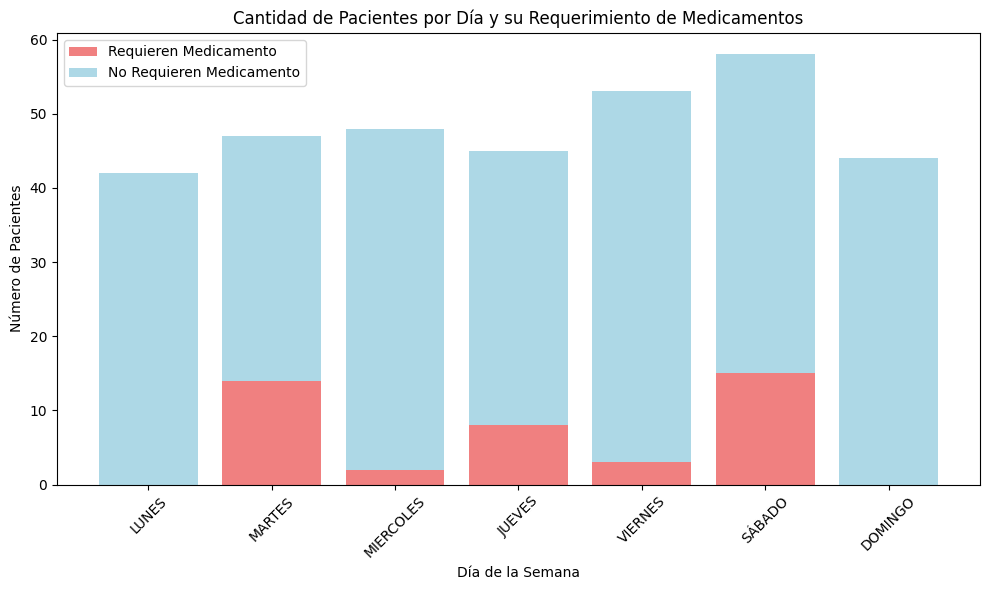

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Lista de días de la semana
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Función para contar pacientes que requieren y no requieren medicamentos por día
def contar_medicamentos_por_dia(df, columna_medicamento, dias_semana):
    conteo_medicamentos = {
        'dia': [],
        'requieren_medicamento': [],
        'no_requieren_medicamento': [],
        'total_pacientes': []
    }

    for dia in dias_semana:
        # Filtrar pacientes que se atienden ese día
        df_dia_total = df[df[dia] == 'Si']

        # Filtrar pacientes que requieren medicamentos
        df_dia_medicamento = df_dia_total[df_dia_total[columna_medicamento].str.contains('Medicamento')]

        # Pacientes que no requieren medicamentos
        df_dia_no_medicamento = df_dia_total[~df_dia_total[columna_medicamento].str.contains('Medicamento')]

        # Agregar los resultados
        conteo_medicamentos['dia'].append(dia)
        conteo_medicamentos['requieren_medicamento'].append(len(df_dia_medicamento))
        conteo_medicamentos['no_requieren_medicamento'].append(len(df_dia_no_medicamento))
        conteo_medicamentos['total_pacientes'].append(len(df_dia_total))

    return pd.DataFrame(conteo_medicamentos)

# Generar los conteos de medicamentos por día
conteo_medicamentos_df = contar_medicamentos_por_dia(pacientes_sm1, 'MEDICAMENTO', dias_semana)
# Crear el gráfico de barras apilado
plt.figure(figsize=(10, 6))

# Barra de pacientes que requieren medicamentos
plt.bar(conteo_medicamentos_df['dia'],
        conteo_medicamentos_df['requieren_medicamento'],
        label='Requieren Medicamento', color='lightcoral')

# Barra de pacientes que no requieren medicamentos, apilado sobre los que requieren
plt.bar(conteo_medicamentos_df['dia'],
        conteo_medicamentos_df['no_requieren_medicamento'],
        bottom=conteo_medicamentos_df['requieren_medicamento'],
        label='No Requieren Medicamento', color='lightblue')

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pacientes')
plt.title('Cantidad de Pacientes por Día y su Requerimiento de Medicamentos')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


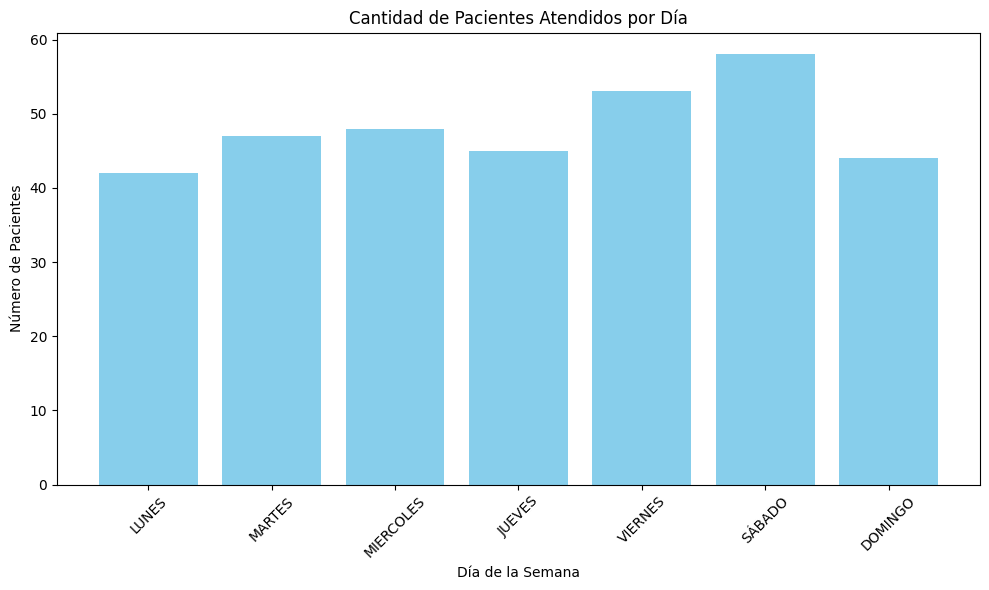

In [10]:
# Función para contar pacientes por día
def contar_pacientes_por_dia(df, dias_semana):
    conteo_pacientes = {
        'dia': [],
        'total_pacientes': []
    }

    for dia in dias_semana:
        # Filtrar pacientes que se atienden ese día
        df_dia_total = df[df[dia] == 'Si']

        # Agregar los resultados
        conteo_pacientes['dia'].append(dia)
        conteo_pacientes['total_pacientes'].append(len(df_dia_total))

    return pd.DataFrame(conteo_pacientes)

# Generar los conteos de pacientes por día
conteo_pacientes_df = contar_pacientes_por_dia(pacientes_sm1, dias_semana)
import matplotlib.pyplot as plt

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))

# Graficar el número total de pacientes por día
plt.bar(conteo_pacientes_df['dia'], conteo_pacientes_df['total_pacientes'], color='skyblue')

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Número de Pacientes')
plt.title('Cantidad de Pacientes Atendidos por Día')

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


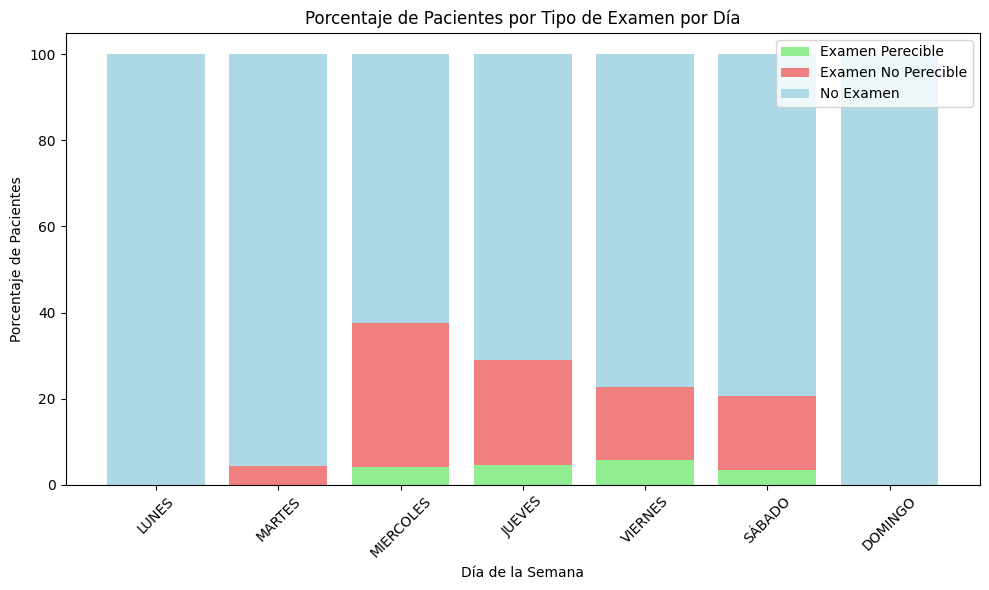

In [13]:
# Función para calcular porcentajes de Examen Perecible, Examen No Perecible y No Examen por día
def calcular_porcentajes_examen(df, columna_examen, dias_semana):
    porcentajes_examen = {
        'dia': [],
        'Examen Perecible': [],
        'Examen No Perecible': [],
        'No Examen': []
    }

    for dia in dias_semana:
        # Filtrar los pacientes que se atienden ese día
        df_dia_total = df[df[dia] == 'Si']

        # Total de pacientes ese día
        total_pacientes = len(df_dia_total)

        if total_pacientes > 0:
            # Contar los pacientes con Examen Perecible
            examen_perecible = df_dia_total[df_dia_total[columna_examen] == 'Examen Perecible']
            porcentaje_perecible = len(examen_perecible) / total_pacientes * 100

            # Contar los pacientes con Examen No Perecible
            examen_no_perecible = df_dia_total[df_dia_total[columna_examen] == 'Examen No Perecible']
            porcentaje_no_perecible = len(examen_no_perecible) / total_pacientes * 100

            # Calcular los pacientes que no requieren examen
            no_examen = total_pacientes - (len(examen_perecible) + len(examen_no_perecible))
            porcentaje_no_examen = no_examen / total_pacientes * 100
        else:
            porcentaje_perecible = 0
            porcentaje_no_perecible = 0
            porcentaje_no_examen = 0

        # Agregar los resultados
        porcentajes_examen['dia'].append(dia)
        porcentajes_examen['Examen Perecible'].append(porcentaje_perecible)
        porcentajes_examen['Examen No Perecible'].append(porcentaje_no_perecible)
        porcentajes_examen['No Examen'].append(porcentaje_no_examen)

    return pd.DataFrame(porcentajes_examen)

# Calcular los porcentajes incluyendo "No Examen"
porcentajes_examen_df = calcular_porcentajes_examen(pacientes_sm1, 'EXAMEN', dias_semana)
# Crear el gráfico de barras apiladas con los porcentajes de Examen Perecible, No Perecible y No Examen
plt.figure(figsize=(10, 6))

# Barra de Examen Perecible
plt.bar(porcentajes_examen_df['dia'],
        porcentajes_examen_df['Examen Perecible'],
        label='Examen Perecible', color='lightgreen')

# Barra de Examen No Perecible, apilada sobre Examen Perecible
plt.bar(porcentajes_examen_df['dia'],
        porcentajes_examen_df['Examen No Perecible'],
        bottom=porcentajes_examen_df['Examen Perecible'],
        label='Examen No Perecible', color='lightcoral')

# Barra de No Examen, apilada sobre Examen No Perecible
plt.bar(porcentajes_examen_df['dia'],
        porcentajes_examen_df['No Examen'],
        bottom=porcentajes_examen_df['Examen Perecible'] + porcentajes_examen_df['Examen No Perecible'],
        label='No Examen', color='lightblue')

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Porcentaje de Pacientes')
plt.title('Porcentaje de Pacientes por Tipo de Examen por Día')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


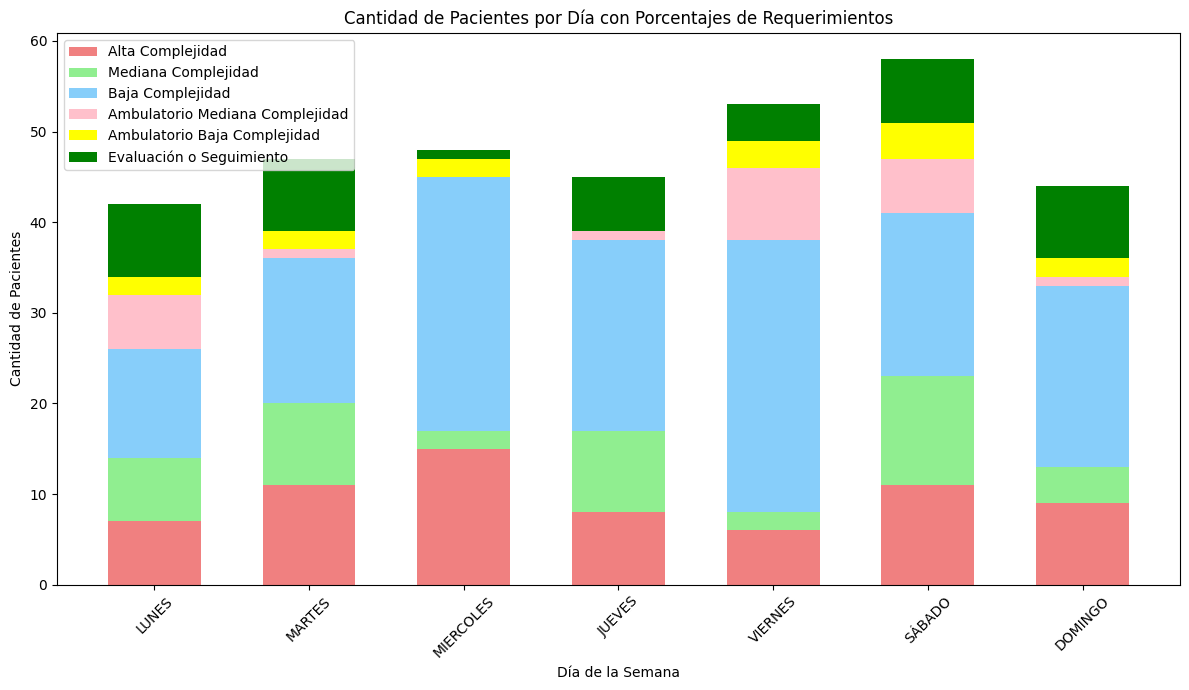

In [22]:
# Crear un DataFrame para contar los pacientes que se atienden cada día
dias_semana = ['LUNES', 'MARTES', 'MIERCOLES', 'JUEVES', 'VIERNES', 'SÁBADO', 'DOMINGO']

# Crear un diccionario para el conteo de pacientes por día
pacientes_por_dia = {dia: pacientes_sm1[pacientes_sm1[dia] == 'Si'].shape[0] for dia in dias_semana}

# Convertir a DataFrame
df_pacientes_por_dia = pd.DataFrame.from_dict(pacientes_por_dia, orient='index', columns=['Total Pacientes'])
df_pacientes_por_dia.reset_index(inplace=True)
df_pacientes_por_dia.columns = ['Dia', 'Total Pacientes']
# Función para calcular porcentajes de tipos de requerimientos
def calcular_porcentajes_requerimientos(df, columna_requerimiento, dias_semana):
    requerimientos = [
        "Alta Complejidad",
        "Mediana Complejidad",
        "Baja Complejidad",
        "Ambulatorio Mediana Complejidad",
        "Ambulatorio Baja Complejidad",
        "Evaluación o Seguimiento"
    ]

    porcentajes_requerimientos = {req: [] for req in requerimientos}

    for dia in dias_semana:
        df_dia = df[df[dia] == 'Si']
        total_pacientes_dia = df_dia.shape[0]

        for req in requerimientos:
            porcentaje_req = (df_dia[df_dia[columna_requerimiento] == req].shape[0] / total_pacientes_dia) * 100
            porcentajes_requerimientos[req].append(porcentaje_req)

    return pd.DataFrame(porcentajes_requerimientos)

# Obtener los porcentajes de requerimientos
porcentajes_requerimientos_df = calcular_porcentajes_requerimientos(pacientes_sm1, 'REQUERIMIENTO', dias_semana)
import matplotlib.pyplot as plt

# Colores para cada tipo de requerimiento
colors = {
    'Alta Complejidad': 'lightcoral',
    'Mediana Complejidad': 'lightgreen',
    'Baja Complejidad': 'lightskyblue',
    'Ambulatorio Mediana Complejidad': 'pink',
    'Ambulatorio Baja Complejidad': 'yellow',
    'Evaluación o Seguimiento': 'green'
}

# Crear el gráfico de barras con las cantidades de pacientes
plt.figure(figsize=(12, 7))

# Crear las barras segmentadas sin la base gris
for i, dia in enumerate(df_pacientes_por_dia['Dia']):
    bottom = 0
    for req in colors.keys():
        # Calcular la altura del segmento según el porcentaje
        height = (porcentajes_requerimientos_df[req][i] / 100) * df_pacientes_por_dia['Total Pacientes'][i]
        plt.bar(dia, height, width=0.6, bottom=bottom, color=colors[req], label=req if i == 0 else "")
        bottom += height

# Etiquetas y título
plt.xlabel('Día de la Semana')
plt.ylabel('Cantidad de Pacientes')
plt.title('Cantidad de Pacientes por Día con Porcentajes de Requerimientos')

# Añadir leyenda
plt.legend()

# Mostrar gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

